In [3]:
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg
import numpy as np
from random import randint
import sys
from matplotlib import pyplot as plt

In [4]:
# ok! now try simulating the cube.
# AS READABLE AS POSSIBLE.
solved_configuration = (
    (0, 0, 0, 0), (1, 1, 1, 1), (2, 2, 2, 2),
    (3, 3, 3, 3), (4, 4, 4, 4), (5, 5, 5, 5)
)

def D(config):
    # unpack.
    (c01, c02, c03, c04), (c11, c12, c13, c14), (c21, c22, c23, c24), \
    (c31, c32, c33, c34), (c41, c42, c43, c44), (c51, c52, c53, c54) = config
    
    # repack.
    return ((c01, c02, c03, c04), (c11, c44, c43, c14), (c21, c22, c12, c13),
            (c31, c24, c23, c34), (c41, c42, c32, c33), (c52, c53, c54, c51))

def Di(config):
    # unpack.
    (c01, c02, c03, c04), (c11, c44, c43, c14), (c21, c22, c12, c13), \
    (c31, c24, c23, c34), (c41, c42, c32, c33), (c52, c53, c54, c51) = config
    
    return ((c01, c02, c03, c04), (c11, c12, c13, c14), (c21, c22, c23, c24), \
            (c31, c32, c33, c34), (c41, c42, c43, c44), (c51, c52, c53, c54))

def L(config):
    (c01, c02, c03, c04), (c11, c12, c13, c14), (c21, c22, c23, c24), \
    (c31, c32, c33, c34), (c41, c42, c43, c44), (c51, c52, c53, c54) = config
    
    return ((c01, c34, c33, c04), (c11, c12, c02, c03), (c21, c22, c23, c24), \
            (c31, c32, c52, c53), (c42, c43, c44, c41), (c51, c14, c13, c54))

def Li(config):
    (c01, c34, c33, c04), (c11, c12, c02, c03), (c21, c22, c23, c24), \
    (c31, c32, c52, c53), (c42, c43, c44, c41), (c51, c14, c13, c54) = config
    
    return ((c01, c02, c03, c04), (c11, c12, c13, c14), (c21, c22, c23, c24), \
            (c31, c32, c33, c34), (c41, c42, c43, c44), (c51, c52, c53, c54))

def B(config):
    (c01, c02, c03, c04), (c11, c12, c13, c14), (c21, c22, c23, c24), \
    (c31, c32, c33, c34), (c41, c42, c43, c44), (c51, c52, c53, c54) = config
    
    return ((c01, c02, c22, c23), (c11, c12, c13, c14), (c21, c54, c53, c24), \
            (c32, c33, c34, c31), (c41, c04, c03, c44), (c51, c52, c42, c43))

def Bi(config):
    (c01, c02, c22, c23), (c11, c12, c13, c14), (c21, c54, c53, c24), \
    (c32, c33, c34, c31), (c41, c04, c03, c44), (c51, c52, c42, c43) = config

    return ((c01, c02, c03, c04), (c11, c12, c13, c14), (c21, c22, c23, c24), \
            (c31, c32, c33, c34), (c41, c42, c43, c44), (c51, c52, c53, c54))

def Dh(config):
    return D(D(config))

def Lh(config):
    return L(L(config))

def Bh(config):
    return B(B(config))

In [5]:
# let's do some math.
start_point = solved_configuration
new_states = set([start_point]) # everything that needs another look at
states = set([start_point]) # everything
links = set([]) # tuples of indexes into states
rotations = [D, Di, L, Li, B, Bi]
rotations += [Dh, Lh, Bh]
states_index = {start_point : 0}

while new_states:
    # get a new base state. this is what we're going to be clearing off our list.
    base_state = new_states.pop()
    
    # now, rotate it in each direction:
    for rotate in rotations:
        new_state = rotate(base_state)
        
        # add the new state
        if new_state not in states:
            new_states.add(new_state)
            states.add(new_state)
            
            states_index[new_state] = len(states) - 1
            
            if len(states) % 100000 == 0:
                sys.stdout.write('.')
                if len(states) % 1000000 == 0:
                    sys.stdout.write('\n')
                sys.stdout.flush()
                
        
        # add the link, if it's new, to the list.
        link = (states_index[base_state], states_index[new_state])
        if link not in links:
            links.add(link)

..........
..........
..........
......

In [6]:
print len(states)
print len(links)
print len(links) / len(states)

3674160
33067440
9


In [7]:
mat = sparse.dok_matrix((3674159, 3674159), dtype=np.float64)
for i in range(3674159):
    mat[i, i] = 1
for e, (s, d) in enumerate(links):
    if e % 100000 == 0:
        sys.stdout.write('.')
        if e % 3600000 == 0:
            sys.stdout.write('\n')
        sys.stdout.flush()
    if s != 0 and d != 0:
        mat[s-1, d-1] = -1/9.

.
....................................
....................................
....................................
....................................
....................................
....................................
....................................
....................................
....................................
......

In [8]:
mat.nnz

36741581

In [9]:
matcsr = mat.tocsr()

In [10]:
sparse.save_npz('htm_csr.npz', matcsr)

In [1]:
matcsr = sparse.load_npz('htm_csr.npz')

NameError: name 'sparse' is not defined

In [40]:
small_size = 3674159
small = matcsr[:small_size, :small_size]

In [11]:
ones = np.ones((3674159, 1))
ones

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [12]:
product = matcsr * ones

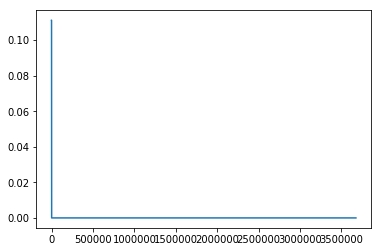

In [13]:
plt.plot(product)
plt.show()

In [14]:
result, conv = sparse.linalg.bicg(matcsr, ones)

In [15]:
assert(conv == 0)
print result.mean()

4410505.476855754
